In [117]:
from bioblue.nb import *
import skimage
import scipy

In [85]:
p = Path("/home/ucl/elen/vjoosdtb/global/bb-data/PA1.4/PA1.4_ROI/")
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(str(p))
reader.SetFileNames(dicom_names)

maskp = Path("/home/ucl/elen/vjoosdtb/global/bb-data/PA1.4/PA1.4_ROI_mask/")
mask_reader = sitk.ImageSeriesReader()
mask_names = mask_reader.GetGDCMSeriesFileNames(str(maskp))
mask_reader.SetFileNames(mask_names)

In [86]:
image = reader.Execute()
ndimg = sitk.GetArrayFromImage(image)

mask = mask_reader.Execute()
ndmask = sitk.GetArrayFromImage(mask)

In [84]:
print(set(range(256))-set(np.unique(ndimg)))

set()


(1024, 292, 318)
75
149
(292, 318)


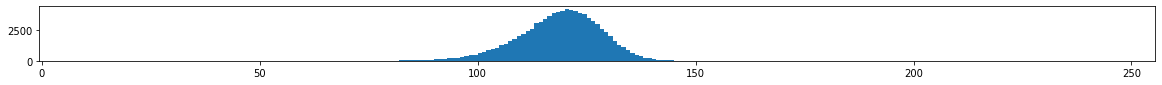

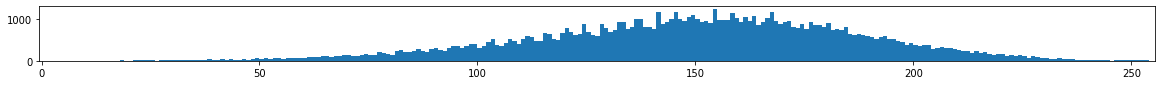

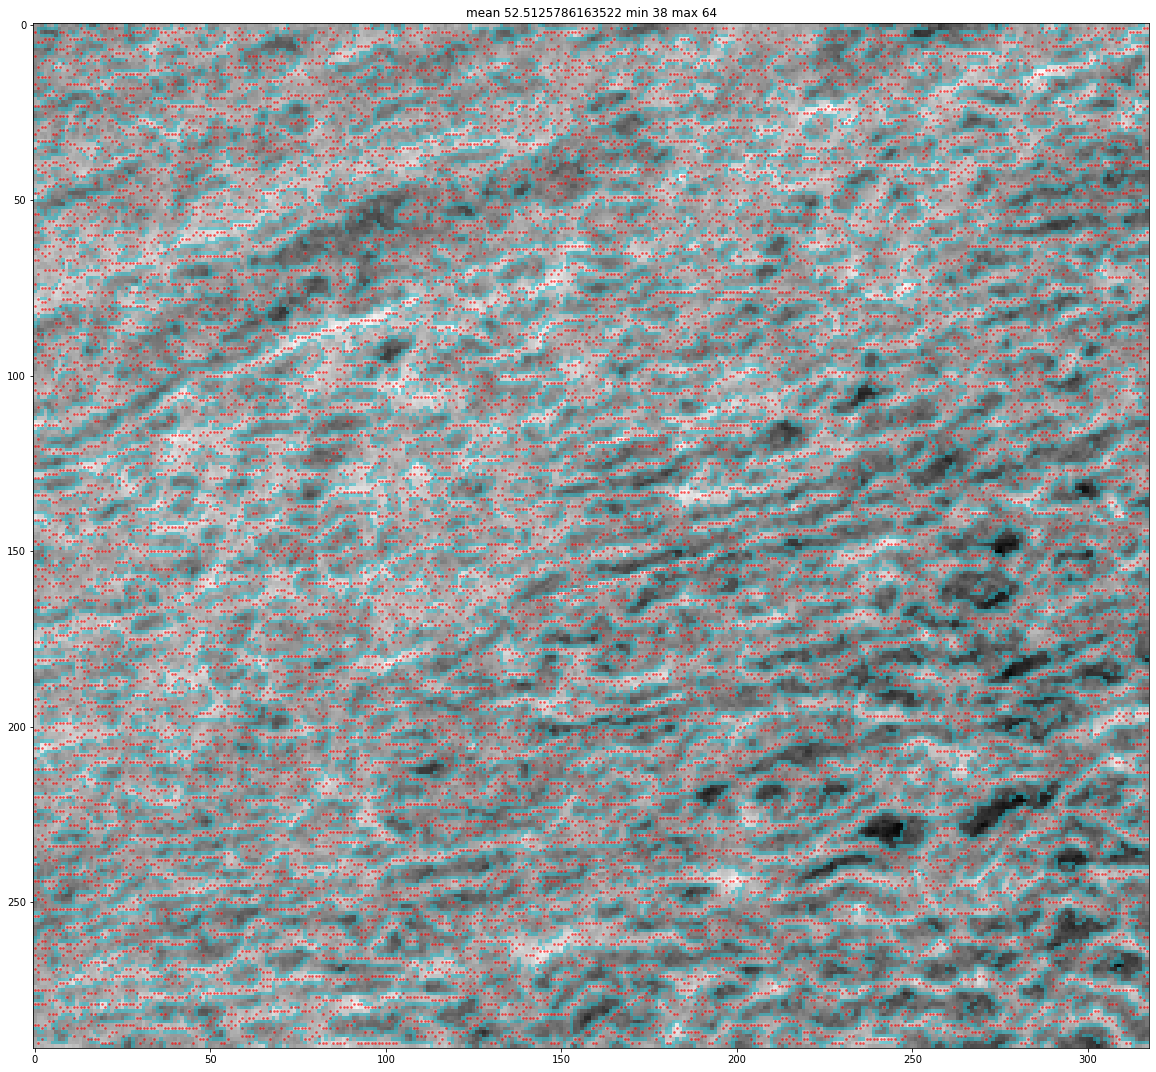

In [151]:
print(ndimg.shape)
# ndimg_eq = skimage.exposure.equalize_adapthist(ndimg)
for img,msk in zip(ndimg[:1],ndmask[:1]):
    # img = cv2.equalizeHist(img)
    fig = plt.figure(figsize=(20,1))
    counts, bins = np.histogram(img.reshape(-1), range(257))
    # plot histogram centered on values 0..255
    plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
    plt.xlim([-0.5, 255.5])
    print(len(np.unique(img)))
    fig = plt.figure(figsize=(20,1))
    counts, bins = np.histogram((skimage.exposure.equalize_adapthist(img)*255).reshape(-1), range(257))
    # plot histogram centered on values 0..255
    plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
    plt.xlim([-0.5, 255.5])
    
    
    for i in range(img.shape[1])[10::20]:
        x = img[:,i]
        peaks, _ = scipy.signal.find_peaks(x, height=0)
#         fig = plt.figure(figsize=(20,1))
#         plt.title(f"{i} - peaks  {len(peaks)}")
#         plt.plot(x)
#         plt.plot(peaks, x[peaks], 'x')
#         plt.show()
    
    fig, axs  = plt.subplots(1,1, figsize=(20,20))
    thresh_mask = np.zeros_like(img)
    print(np.max(img))
    thresh_mask[img>150] = 1
#     axs.imshow(img, cmap="gray")
    grad = cv2.Canny((skimage.exposure.equalize_adapthist(img)*255).astype(np.uint8), 170, 200)
    print(grad.shape)
    axs.imshow(img, cmap="gray")
    axs.imshow(grad, cmap=bb.plot.cm.default, alpha=0.5)

    peak_number = []
    for i in range(img.shape[1])[::1]:
        x = img[:,i]
        peaks, _ = scipy.signal.find_peaks(x, height=110)
        peak_number.append(len(peaks))
        # axs[0].axvline(i, alpha=0.5)
        axs.scatter(len(peaks)*[i], peaks, alpha=0.5, c="red", s=3)
    # axs[0].imshow(msk, alpha=0.5, cmap=bb.plot.cm.hsv, interpolation='none')
    # axs[1].imshow(skimage.exposure.equalize_adapthist(img ,kernel_size=(20,20))*255, cmap="gray", vmin=0, vmax=255)
    # axs[1].imshow(thresh_mask, alpha=0.5, cmap=bb.plot.cm.hsv, interpolation='none')
    axs.set_title(f"mean {np.mean(peak_number)} min {np.min(peak_number)} max {np.max(peak_number)}")
    plt.show()
    plt.close()